

---
---


# **DRY BEAN CLASSIFICATION USING MACHINE LEARNING**

---
---


This project applies ML techniques to classify dry bean varieties using geometric and shape-based features extracted from images of 13611 grains of 7 different dry beans. <br>     <br>Exploratory Data Analysis is performed to understand data distribution and feature relationships, followed by Preprocessing steps such as encoding and scaling. Multiple supervised classification models are trained and evaluated to identify the best-performing model.

## **ML WORKFLOW**

### 1. Importing Essential Libraries
### 2. Loadind Dataset
### 3. Basic Data Inspection

============================================
### 4.Exploratory Data Analysis (EDA) <br> ======================================
- Target Variable Analysis
- Univariate analysis
- Bivariate analysis
- Correlation analysis


============================================
### 5.Data Preprocessing
 ============================================
- Missing value Analysis
- Feature & Target Seperation


============================================
### 6. Feature Engineering
 ============================================
- Encoding Target Variable
- Feature scaling
- Train-test split


### 7. Train Test Split

============================================
### 8. Model Building
 ============================================
- Logistic Regression
- KNN
- Naive's Bayes
- SVM
- Decision Tree
- Random Forest
- CatBoost

### 9. Model Evaluation

### 10. Hyperparameter Tuning (SVM, RF, CatBoost)

### 11. Bias Variance Analysis

### 12. Final Model Selection & Evaluation

### 13. Feature Importance Analysis

### 14. Model Deployement

## **1. Importing Essential Libraries**
---
- Import essential libraries for data manipulation, visualization, and modeling
- pandas and numpy are used for data handling
- matplotlib and seaborn are used for exploratory data analysis
- sklearn is used for preprocessing and model building


In [42]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import warnings
warnings.filterwarnings('ignore')

## **2. Loading the Dataset**
---
- Load the Dry Bean dataset into a pandas DataFrame
- The dataset contains shape-based numerical features  (16) extracted from bean images
and a categorical target variable representing different dry bean classes.


In [44]:
df=pd.read_excel('/content/drive/MyDrive/Dry_Bean_Dataset.xlsx')

## **3. Basic Data Inspection**
---
In order to ensure data integrity before analysis data structure, column names, data types, overall format, basic and statistical overview of dataset are to verified. <br>
### Dataset Description:
- Dataset name : Dry Bean Dataset
- Shape : rows = 13611 , columns= 17
- Feature types : Numerical features = 16 ,  categorical features (Target) = Class
- Sample featues : Area, Perimeter, MajorAxisLength, MinorAxisLength, Eccentricity, Solidity, Compactness, etc.
###Overall summary of dataset:
- Dataset size     : Medium
- Dimensionality   : Low
- Problem type     : Multi-class classification
- Complexity level : Moderate

In [45]:
# Display dataset
#-----------------
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [46]:
# Check dataset shape :
#-----------------------------
# to understand the number of rows (samples) and columns (features + target variable)
df.shape

(13611, 17)

In [47]:
# Display dataset information :
#----------------------------------------
# to check data types and confirm the absence of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [48]:
# To get statistical info
#----------------------------------
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## **4. Exploratory Data Analysis**
---
---
EDA is performed to understand data distribution, feature relationships and class balance; to identify missing values and to detect outliers; to identify patterns; to detect correlations among variables, and analyze how different physical characteristics influence bean classification.

### 4.1 Target Variable Analysis
---

Analyze the distribution of the target variable 'Class'. This helps identify class balance or imbalance in the dataset and guides the choice of evaluation metrics.


In [49]:
# Target Variable Analysis :
#---------------------------------
df['Class'].value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


Target variable (Class) indicate the different types of dry beans- Dermason, Sira, Seeker, Horoz, Cali, Barbunya and Bombay. <br>
The dataset shows moderate class imbalance, with the minority class(BOMBAY-522)having significantly fewer samples than the majority class(DERMASON-3546). As the Ratio between them is  ≈ 7 : 1. Need for sampling should be checked during modelling.

### 4.2 Univariate Analysis
---
Univariate analysis is used to study individual feature distributions.
-  Histograms help identify skewness and spread of numerical features
- Boxplots are used to detect the presence of outliers and understand data spread.


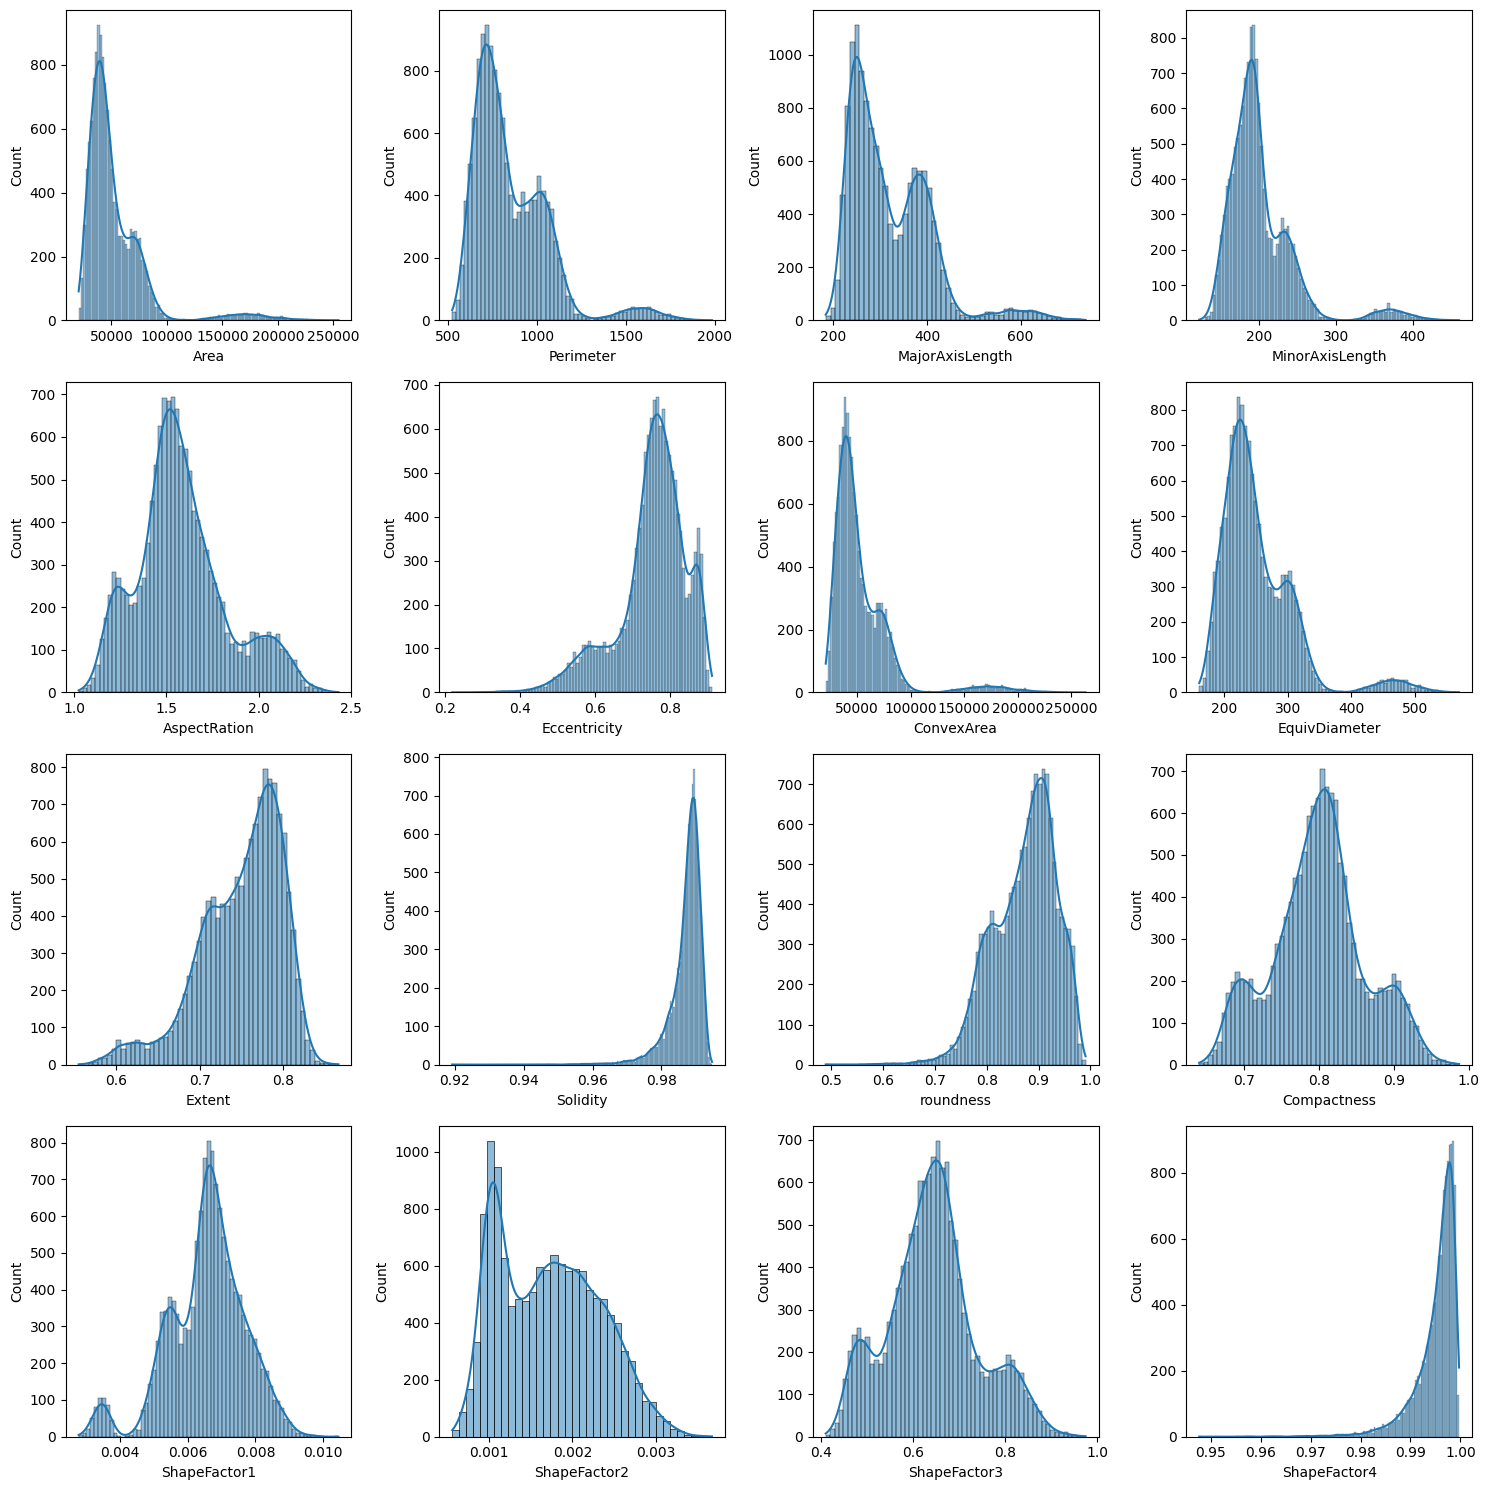

In [50]:
#Plotting histogram to visualize feature distribution
#-----------------------------------------------------

# Select numerical columns
n = df.select_dtypes(include='number')

n_cols = 4
n_rows = (len(n.columns) + n_cols - 1) // n_cols  # auto rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(n.columns):
    sns.histplot(data=n, x=col, kde=True, ax=axes[i])
    axes[i].set_xlabel(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [51]:
n.skew().sort_values(ascending=False)

,0
Area,2.952931
ConvexArea,2.941821
MinorAxisLength,2.238211
EquivDiameter,1.948958
Perimeter,1.626124
MajorAxisLength,1.357815
AspectRation,0.582573
ShapeFactor2,0.301226
ShapeFactor3,0.242481
Compactness,0.037115


Several numerical features (Area, Perimeter, Axis Lengths)showed positive skewness, particularly size-based attributes. Shape-related features like Solidity, Extent, and Roundness showed relatively compact distributions.<br>This suggest the importance of feature scaling an important preprocessing step before applying ML models.
<br>
Historam helped to understand data spread, although transformations were not mandatory for tree-based models. This analysis helped in selecting appropriate algorithms.

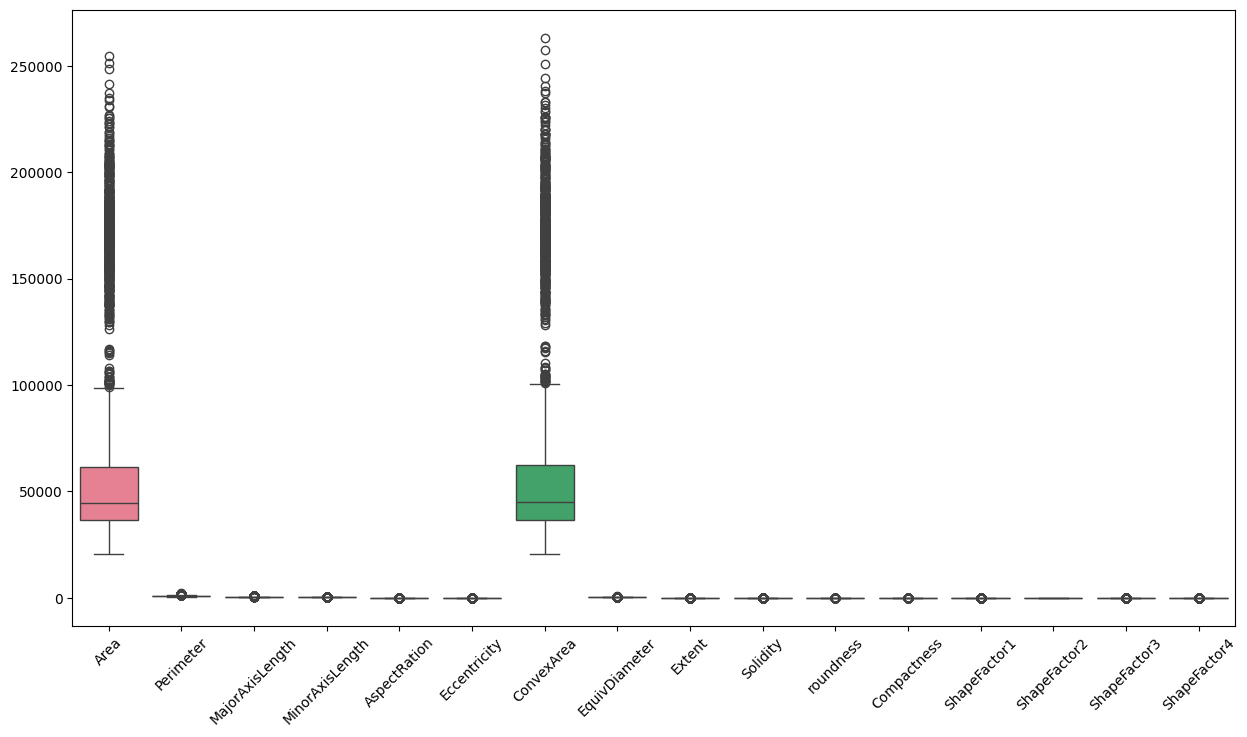

In [52]:
# Boxplot (Outlier detection)
#-----------------------------
plt.figure(figsize=(15, 8))
sns.boxplot(data=n)
plt.xticks(rotation=45)
plt.show()

 Outliers were observed mainly in size-related features due to natural variations in bean growth. They are retained for modeling as models capable of handling non-linear patterns were selected which avoids the loss of important class-specific information.

### 4.3 Bivariate Analysis
---
 Perform bivariate analysis between features and the target variable. This helps understand how individual features vary across bean classes and identifies features that contribute to class separation.


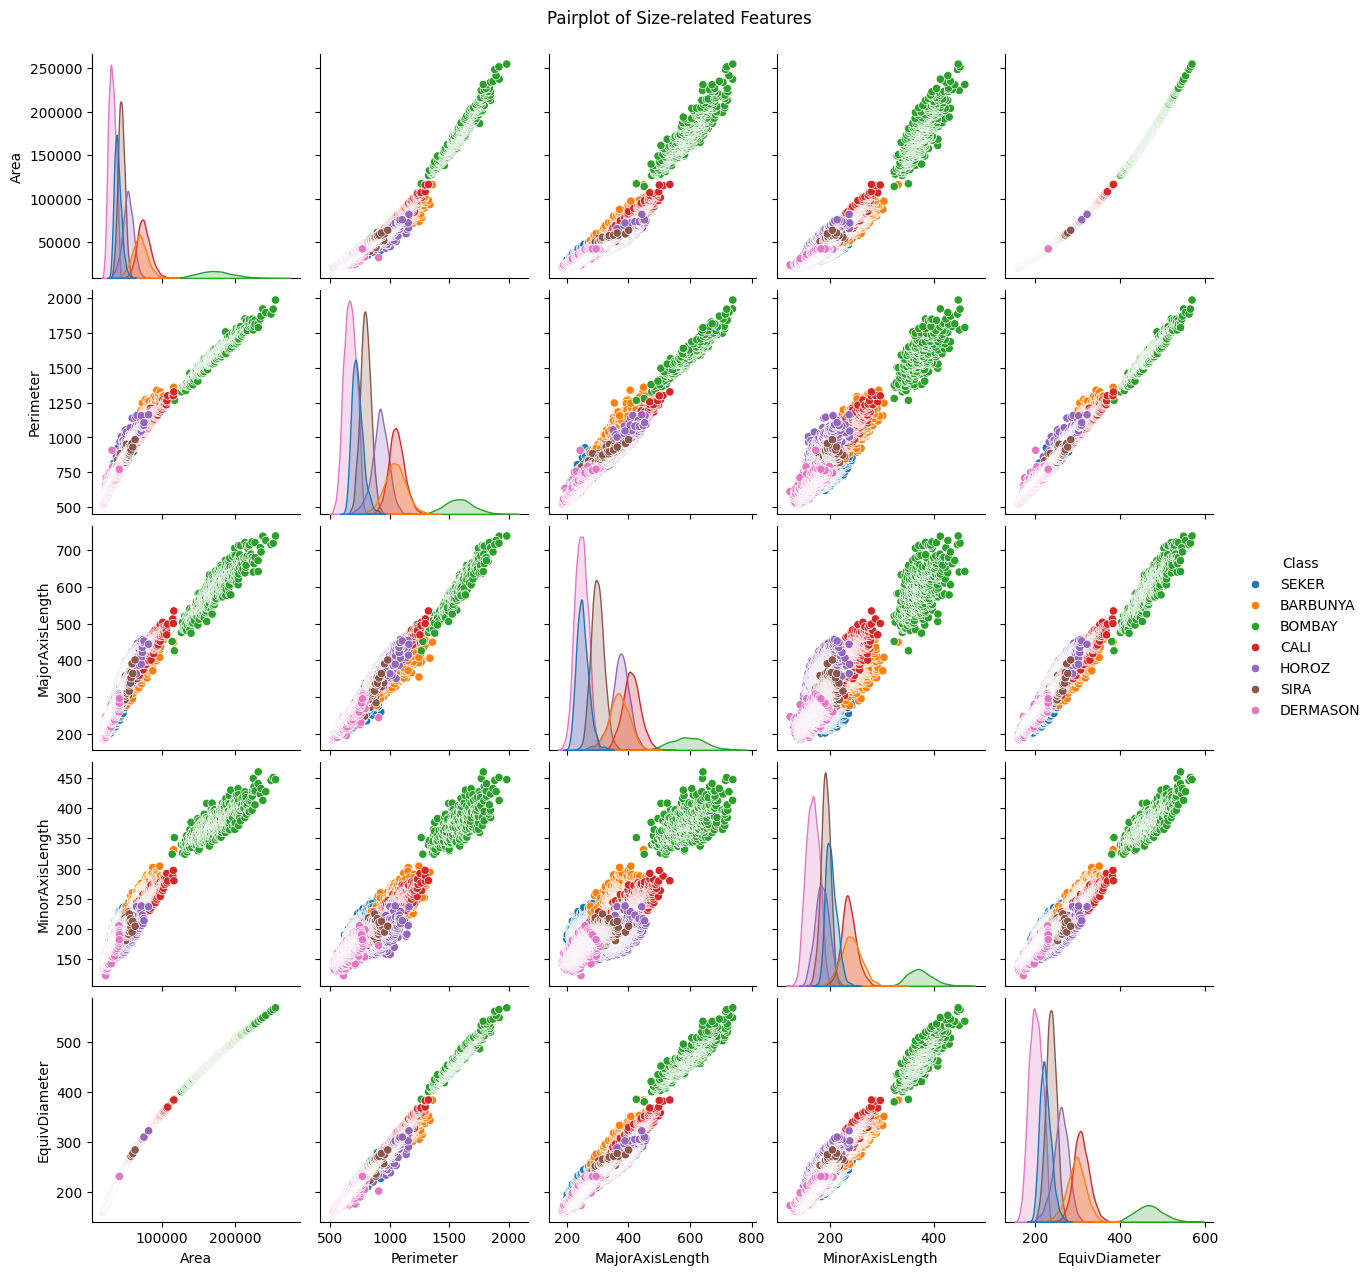

In [53]:
#Features are divided into size and shape related features

# Plotting pairplots for Size related features
#--------------------------------------------------
size_features = [
    'Area',
    'Perimeter',
    'MajorAxisLength',
    'MinorAxisLength',
    'EquivDiameter'
]

sns.pairplot(df[size_features + ['Class']], hue='Class')
plt.suptitle("Pairplot of Size-related Features", y=1.02)
plt.show()

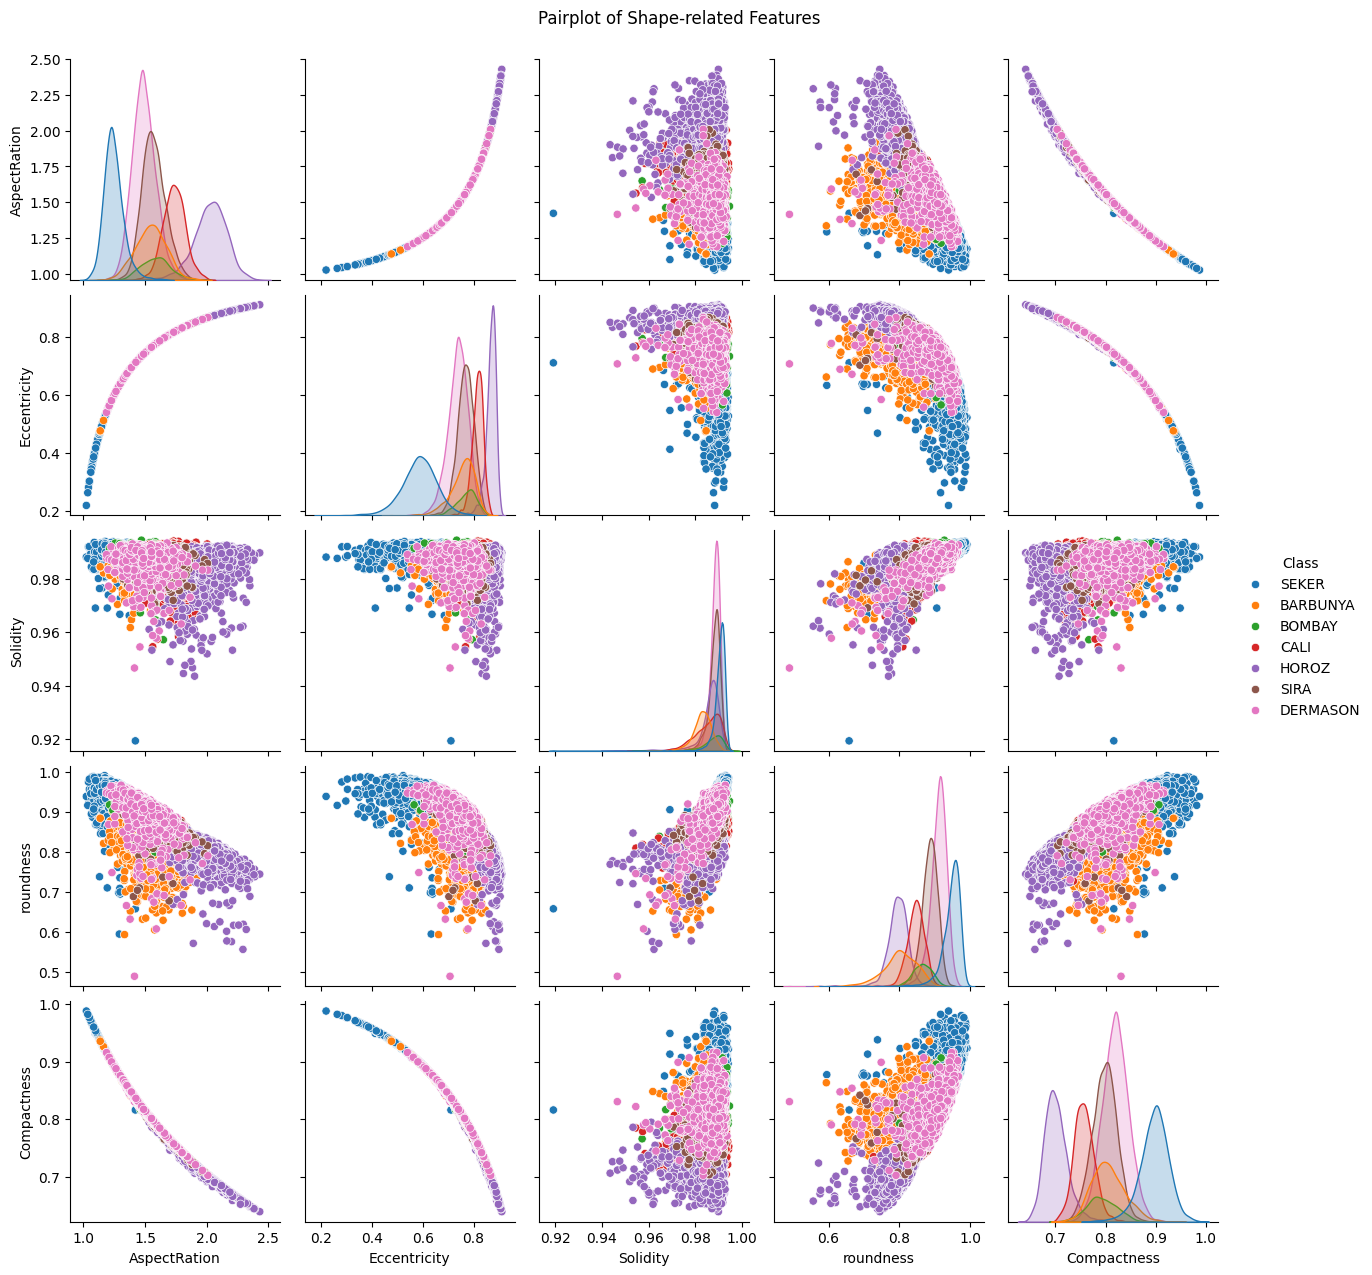

In [54]:
# Plotting pairplots for Shape related features
#--------------------------------------------------
shape_features = [
    'AspectRation',
    'Eccentricity',
    'Solidity',
    'roundness',
    'Compactness'
]
sns.pairplot(df[shape_features + ['Class']],hue='Class')
plt.suptitle("Pairplot of Shape-related Features", y=1.02)
plt.show()


Pairplot analysis revealed strong linear relationships among size-related features such as Area, Perimeter, and Axis lengths, resulting in clear class separability. Shape-related features exhibited non-linear relationships and partial overlap among classes, indicating moderate discriminative ability. Also Different bean varieties exhibit distinct shape distributions.The combination of size and shape attributes provides a robust feature set for Dry Bean classification.

### 4.4 Correlation Analysis
---
Compute correlation matrix to analyze relationships among numerical features
- Highly correlated features indicate similar geometric properties
- Tree-based models can handle such correlations effectively


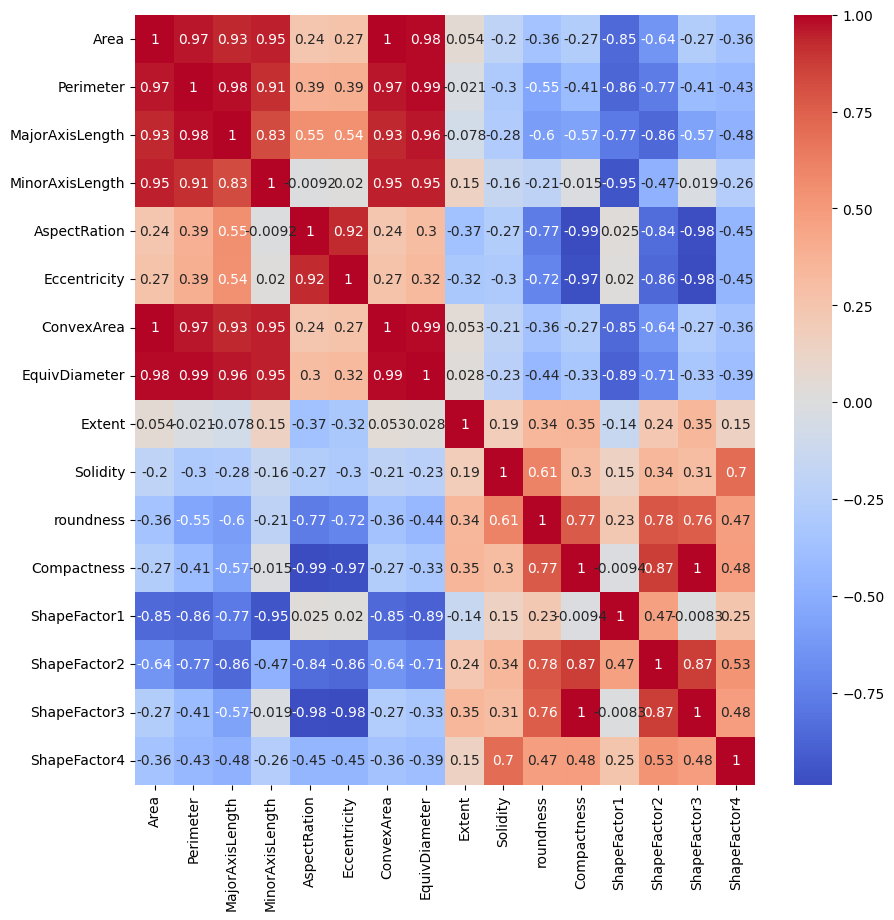

In [55]:
# plotting correlation heatmap
#---------------------------------
n=df.select_dtypes(include='number')
plt.figure(figsize=(10,10))
sns.heatmap(n.corr(),annot=True,cmap='coolwarm')
plt.show()

Correlation heatmap reveals strong positive correlations among size realted features such as Area, Perimeter, Axis Lengths. Strong correlations suggest redundancy among size-related features, which may be reduced using feature selection. Tree based models can handle correlated faetures effectively

## **5. Pre-processing**
---
---
Preprocessing prepares the raw data for modeling by cleaning and splitting the dataset.

### 5.1 Missing value check
---

The Dry Bean dataset does not contain missing values,
ensuring data completeness and reliability.

In [56]:
# Missing Value check in each column
#---------------------------------------
df.isnull().sum()


,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


### 5.2 Feature & Target Seperation
---
Separate independent features (all numerical columns) and target variable as x and y

In [82]:
# Column seperation
#---------------------
x=df.drop('Class',axis=1)
y=df['Class']

## **6. Feature Engineering**
---
---
Encoding was applied to convert class labels into numerical form, and feature scaling was performed to normalize input features. These steps ensured compatibility with machine learning algorithms and improved model performance.

### 6.1 Encoding Target Variable:
---
Encode the categorical target variable 'Class' into numerical format
- Label Encoding is used as the classes are nominal and unordered.
- It assigns a unique integer to each category


In [58]:
#Label Encoding
#-----------------
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

### 6.2 Feature Scaling
---
Standardize the range of independant features and ensures that all features contribute equally to the model.
- Apply feature scaling using StandardScaler
- It can handle outliers
- Scaling is required for distance-based classifiers (KNN, SVM)
- Features are on different scales.
- Tree-based models such as Decision Trees and Random Forests are not sensitive to feature scaling


In [59]:
# Standardization using Standardscaler
#--------------------------------------------
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

## **7. Train-Test-Split**
---
---
Split the dataset into training and testing sets
- Training data is used to learn patterns (80% training)
- Testing data is used to evaluate model (20% testing)generalization
- Stratification ensures proportional representation of all classes
- random_state for reproducibility

In [60]:
#splitting dataset into train and test data
#--------------------------------------------
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42,stratify=y)

## **8. Model Building**
---
---
Multiple classification algorithms were selected to compare linear, distance-based, and tree-based approaches for the Dry Bean dataset.
- Models included :
     1. **Logistic Regression**
     2. **KNN**
     3. **Naive's Bayes**
     4. **SVM**
     5. **Decision Tree**
     6. **Random Forest**
     7. **CatBoost**
- Baseline models (simple,  fast & interpretable ; without optimization) : Logistic regression, Naive Bayes, KNN, Decision Tree
- Model training is also included with model building.


   

### 8.1 Logistic Regression
---

- Logistic regression models the relationship between features & target using a linear equation and applies a sigmoid function to predict the probability of each class.
- Baseline Model



In [61]:
#Logistic Regressor
#-------------------------
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regressor
lr_classifier=LogisticRegression()

# Train the model
lr_classifier.fit(x_train, y_train)

# Prediction
y_pred_lr=lr_classifier.predict(x_test)


### 8.2 K-Nearest Neighbors
---
- K-NN classifies a data point based on the majority class of its k nearest neighbors using a distance metric.
- Used for distance based learning
- n_neighbors is set to the default value

In [62]:
#KNN CLassifier
#-----------------
from sklearn.neighbors import KNeighborsClassifier

# Initilaize model
knn_classifier=KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(x_train,y_train)

# Prediction
y_pred_knn=knn_classifier.predict(x_test)

### 8.3 Naive Bayes
---
- Naive Bayes is a probabilistic classification algorithm based on Bayes’ Theorem with the assumption that features are independant of each other and predicts the class with the highest posterior probability.
- Its simple, fast and effective for baseline classification tasks.
- Gaussian Naive Bayes is used because all features are continuous numerical variables

In [63]:
# Naive Bayes Classifier
# ---------------------
from sklearn.naive_bayes import GaussianNB

# Initialize model
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(x_train, y_train)

# Prediction
y_pred_nb = nb_classifier.predict(x_test)


### 8.4 Decision Tree
---
- Decision tree splits the data into branches based on feature values that maximize information gain.
- Used for non linear patterns

In [64]:
# Decision Tree Classifier
#--------------------------------
from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt_classifier=DecisionTreeClassifier( random_state=42)

# Train the model
dt_classifier.fit(x_train,y_train)

# Prediction
y_pred_dt=dt_classifier.predict(x_test)

### 8.5 Support Vector Machine
---
- SVM finds an optimal hyperplane that maximizes the margin between classes.
- As the data is high dimensional and not perfectly linearly seperable SVM with rbf is used.
- The RBF kernel allows it to capture non-linear decision boundaries

In [65]:
# SVM Classifier
#-------------------
from sklearn.svm import SVC

# Initialize SVM
svm_classifier = SVC()
# Train the model
svm_classifier.fit(x_train, y_train)

# Predictions
y_pred_svm=svm_classifier.predict(x_test)


### 8.6 Random Forest
---
- Random forest builds multiple decision trees using random subsets of data and features, and combines their predictions using majority voting.
- Ensemble learning technique with high accuracy
- It reduces overfitting compared to a single decision tree and performs well on high dimensional data

In [66]:
# Random Forest Classifier
#----------------------------
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)

# Train the model
rf_classifier.fit(x_train,y_train)

# Predictions
y_pred_rf=rf_classifier.predict(x_test)

### 8.7 CatBoost (Categorical Boosting)
---
- CatBoost  is a gradient boosting algorithm that builds an ensemble of decision trees sequentially, where each new tree corrects the errors of the previous ones.
- Automatically handles categorical data without manual encoding

- Less prone to overfitting (use ordered boosting)compared to traditional boosting methods

- Works well on both small and large datasets

- Requires minimal hyperparameter tuning
- Give high performance and stability

In [67]:
# Installing CatBoost
!pip install catboost

In [68]:
# Catboost Classifier
#-----------------------
from catboost import CatBoostClassifier

# Initialize CatBoost
cat_classifier = CatBoostClassifier(verbose=0)

# Train model
cat_classifier.fit(x_train, y_train)

# Predictions
y_pred_cat=cat_classifier.predict(x_test)

## **9. Model Evaluation (baseline)**
---
---
Model evaluation focuses on identifying the most suitable machine learning algorithm for the given dataset by comparing multiple models using consistent evaluation criteria

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Dictionary of models
models = {
    'Log Regression': lr_classifier,
    'KNN': knn_classifier,
    'Naive Bayes': nb_classifier,
    'Decision Tree': dt_classifier,
    'SVM': svm_classifier,
    'Random Forest': rf_classifier,
    'Catboost': cat_classifier
}

#list to store results
results = []

#Evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision' : precision_score(y_test, y_pred, average='weighted'),
        'Recall' : recall_score(y_test, y_pred, average='weighted'),
        'F1 Score' : f1_score(y_test, y_pred, average='weighted')
    })

#convert to dataframe
results_df = pd.DataFrame(results)
print('='*15 + 'Baseline Evaluation of Models' +'='*15,'\n' )
results_df


===============Baseline Evaluation of Models=============== 



,Model,Accuracy,Precision,Recall,F1 Score
0,Log Regression,0.921043,0.921850,0.921043,0.921233
1,KNN,0.917003,0.917728,0.917003,0.917153
2,Naive Bayes,0.897907,0.900702,0.897907,0.898075
3,Decision Tree,0.892031,0.891693,0.892031,0.891630
4,SVM,0.922145,0.922426,0.922145,0.922177
5,Random Forest,0.920676,0.920858,0.920676,0.920650
6,Catboost,0.922879,0.922904,0.922879,0.922812


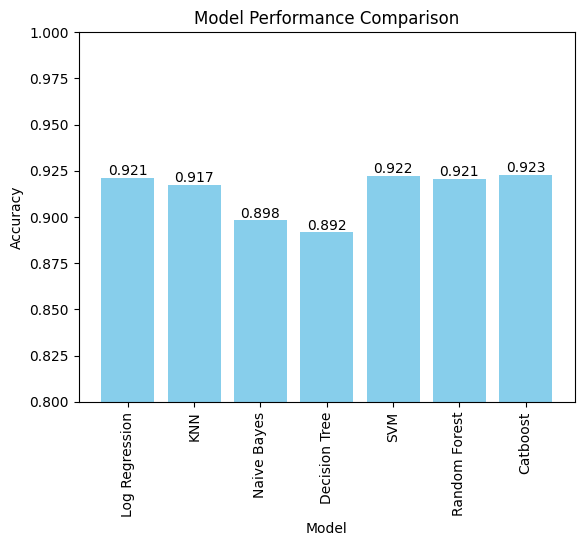

In [70]:
# Visualizing the Model Evaluation
#-------------------------------------
#Model performance is visualized using a bar plot of F1-score to enable
#a clear and balanced comparison across classifiers.

f1_scores = results_df['F1 Score']

bars = plt.bar(results_df['Model'], f1_scores, color='skyblue')
plt.xticks( rotation=90)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.ylim(0.8, 1.0)
plt.show()


## Key Obseravtions from Baseline Evaluation
- CatBoost performed best due to its ability to handle complex feature interactions.

- SVM showed competitive performance, indicating good class separation.

- Logistic Regression performed well, suggesting near-linear separability in the data.
- All selected classifiers achieved high accuracy, indicates dataset is well-structured and informative
- Naive Bayes and Decision Tree underperformed due to independence assumptions and overfitting tendency.
- Accuracy, Precision, Recall, and F1-score values are well-balanced across models, indicating no major class imbalance issues.

## **10. Hyperparameter Tuning**
---
---
Hyperparameter tuning is the process of selecting the best values for model parameters that are set before training in order to improve model performance and generalization.
- Hyperparameters control learning
- It reduces overfitting
- To avoid underfitting
- To improve accuracy & F1-score
- To get best bias–variance trade-off

Based on baseline evaluation, CatBoost and SVM were identified as the best-performing models and selected for further analysis and tuning. (Logistic Regression is used as a baseline due to its simplicity and stability, whereas Random Forest is tuned because its performance is highly sensitive to hyperparameters.)


Validation is used during tuning to select the best hyperparameters without touching the test data. Validation score will be higher as the model has “seen similar data” during training.

### 10.1 Random Forest – Hyperparameter Tuning
---
- Used RandomizedSearchCV (faster + recommended)
- RF performance is highly sensitive to depth and tree structure.

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define Random Forest and parameter grid
rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use RandomizedSearchCV for tuning
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=5,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42
)

# Fit on training data
rf_random.fit(x_train, y_train)

# Best model
best_rf = rf_random.best_estimator_

# Validation F1 from cross-validation (best score)
best_val_f1_rf = rf_random.best_score_

# Test F1 on unseen data
y_pred_rf_tuned = best_rf.predict(x_test)
test_f1_rf = f1_score(y_test, y_pred_rf_tuned, average='weighted')

# Print results
print('RF Best Parameters:', rf_random.best_params_)
print('RF Best Validation F1 Score:', best_val_f1_rf)
print('RF Test F1 Score:', test_f1_rf)

RF Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
RF Best Validation F1 Score: 0.924102588729721
RF Test F1 Score: 0.9206504710179503


### 10.2 Support Vector Machine – Hyperparameter Tuning
---
- Used GridSearchCV (fewer parameters)
- SVM is sensitive to C and kernel choice

In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()

# Parameter grid for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid search for SVM
svm_grid = GridSearchCV(
    estimator=svm,
    param_grid=svm_params,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# Fit on training data
svm_grid.fit(x_train, y_train)

# Best model
best_svm = svm_grid.best_estimator_

# Validation F1 from CV
best_val_f1_svm = svm_grid.best_score_

# Test F1 on unseen data
y_pred_svm_tuned = best_svm.predict(x_test)
test_f1_svm = f1_score(y_test, y_pred_svm_tuned, average='weighted')

# Print results
print('SVM Best Parameters:', svm_grid.best_params_)
print('SVM Best F1 (Validation/CV):', best_val_f1_svm)
print('SVM F1 on Test Set :', test_f1_svm)



SVM Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best F1 (Validation/CV): 0.9333509315757909
SVM F1 on Test Set : 0.9242952775176317


### 10.3 CatBoost – Hyperparameter Tuning
---
- Used manual tuning + early stopping (FAST & effective)
- CatBoost has built-in optimization
- Early stopping prevents overfitting
- Faster than Grid/Random search

In [73]:
# Manual Tuning with Early stopping
#------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier

# Optional: split a validation set from training for early stopping
x_train_cb, x_val_cb, y_train_cb, y_val_cb = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# List of parameter combinations to try
param_combinations = [
    {"depth": 4, "learning_rate": 0.1,  "l2_leaf_reg": 3},
    {"depth": 6, "learning_rate": 0.1,  "l2_leaf_reg": 5},
    {"depth": 6, "learning_rate": 0.05, "l2_leaf_reg": 5},
    {"depth": 8, "learning_rate": 0.05, "l2_leaf_reg": 7}
]

best_f1 = 0
best_model = None
best_params = None

f1_scores_list = []

for params in param_combinations:
    model = CatBoostClassifier(
        iterations=500,
        loss_function='MultiClass',
        subsample=0.8,
        bootstrap_type='Bernoulli',
        early_stopping_rounds=50,
        verbose=0,
        **params
    )

    # Train on training split, validate on validation split
    model.fit(
        x_train_cb, y_train_cb,
        eval_set=(x_val_cb, y_val_cb)
    )

    preds = model.predict(x_val_cb)

    # Compute weighted F1-score
    f1 = f1_score(y_val_cb, preds, average='weighted')
    f1_scores_list.append(f1)

    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_params = params


# After tuning, evaluate on the test set
preds_test = best_model.predict(x_test)
test_f1 = f1_score(y_test, preds_test, average='weighted')

# Print results
print("Best Parameters (CatBoost):", best_params)
print("Best F1 Score (Validation):", best_f1)
print("F1 Score on Test Set:", test_f1)

Best Parameters (CatBoost): {'depth': 8, 'learning_rate': 0.05, 'l2_leaf_reg': 7}
Best F1 Score (Validation): 0.9374159147059036
F1 Score on Test Set: 0.9239634757131981


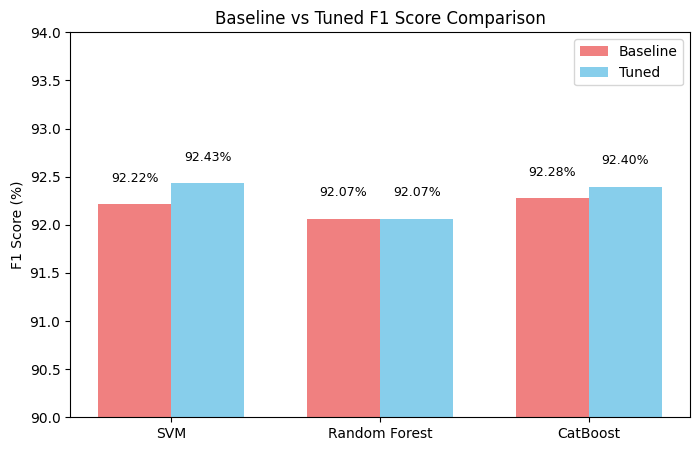

In [74]:
#Baseline & Tuned Model Performance Visualization
#------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Models
models = ['SVM', 'Random Forest', 'CatBoost']

# Baseline F1-scores
baseline_preds = [y_pred_svm, y_pred_rf, y_pred_cat]
baseline_f1 = [f1_score(y_test, pred, average='weighted') * 100 for pred in baseline_preds]

# Tuned F1-scores
tuned_preds = [y_pred_svm_tuned, y_pred_rf_tuned, best_model.predict(x_test)]
tuned_f1 = [f1_score(y_test, pred, average='weighted') * 100 for pred in tuned_preds]

# Plot
x = np.arange(len(models))  # x-axis locations
width = 0.35  # bar width

plt.figure(figsize=(8,5))
bars1 = plt.bar(x - width/2, baseline_f1, width, label='Baseline', color='lightcoral')
bars2 = plt.bar(x + width/2, tuned_f1, width, label='Tuned', color='skyblue')

plt.xticks(x, models)
plt.ylabel('F1 Score (%)')
plt.ylim(90, 94)  # match percentage scale
plt.title('Baseline vs Tuned F1 Score Comparison')
plt.legend()

# Add value labels on top of bars in %
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            yval + 0.2,
            str(f"{yval:.2f}%"),  # explicitly convert to string
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.show()


## **11. Bias- Variance Analysis**
---
---
Tuning may improve performance but can increase overfitting. Overfitting analysis verifies generalization.

### Overfitting findings:
- RF shows clear overfitting even after tuning : It fits training data too strongly and does not generalize as well.
- SVM has very small gap indicating excellent bias–variance balance as it can generalize well to unseen data.
- CatBoost performs well but shows controlled overfitting as it have a mModerate gap, ut better generalization than RF.


In [75]:
from sklearn.metrics import f1_score

# -------- Random Forest --------
train_f1_rf = f1_score(y_train, best_rf.predict(x_train), average='weighted')
test_f1_rf  = f1_score(y_test,  best_rf.predict(x_test),  average='weighted')
train_test_gap_rf = train_f1_rf - test_f1_rf

# -------- SVM --------
train_f1_svm = f1_score(y_train, best_svm.predict(x_train), average='weighted')
test_f1_svm  = f1_score(y_test,  best_svm.predict(x_test),  average='weighted')
train_test_gap_svm = train_f1_svm - test_f1_svm

# -------- CatBoost --------
train_f1_cb = f1_score(y_train_cb, best_model.predict(x_train_cb), average='weighted')
test_f1_cb  = f1_score(y_test,     best_model.predict(x_test),     average='weighted')
train_test_gap_cb = train_f1_cb - test_f1_cb


In [76]:
import pandas as pd

# Create Bias–Variance comparison table
bias_variance_df = pd.DataFrame({
    "Model": ["Random Forest", "SVM", "CatBoost"],
    "Train F1 (%)": [train_f1_rf*100, train_f1_svm*100, train_f1_cb*100],
    "Test F1 (%)":  [test_f1_rf*100,  test_f1_svm*100,  test_f1_cb*100],
    "Train–Test Gap (%)": [
        train_test_gap_rf*100,
        train_test_gap_svm*100,
        train_test_gap_cb*100
    ]
}).round(2)

print('-'*63)
print( "     --------Tuned Models Overfitting Analysis---------")
print('-'*63)
bias_variance_df


---------------------------------------------------------------
     --------Tuned Models Overfitting Analysis---------
---------------------------------------------------------------


,Model,Train F1 (%),Test F1 (%),Train–Test Gap (%)
0,Random Forest,100.00,92.07,7.93
1,SVM,93.94,92.43,1.51
2,CatBoost,95.52,92.40,3.12


## **12. Final Model Selection & Evaluation**
---
---
- Best model is selected according to test f1 & overfitting gap
- Final evaluation is performed on the unseen test set
- Evaluations (Confusion Matrix,Classification Report, ROC–AUC curve) are carried out for final selected model


---------------------------------------------------------------
 FINAL MODEL PERFORMANCE : SVM 
Test Accuracy : 0.9243
Test F1 Score : 0.9243

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       265
           1       1.00      1.00      1.00       104
           2       0.94      0.94      0.94       326
           3       0.91      0.92      0.92       709
           4       0.96      0.96      0.96       386
           5       0.94      0.95      0.95       406
           6       0.87      0.86      0.87       527

    accuracy                           0.92      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.92      0.92      0.92      2723



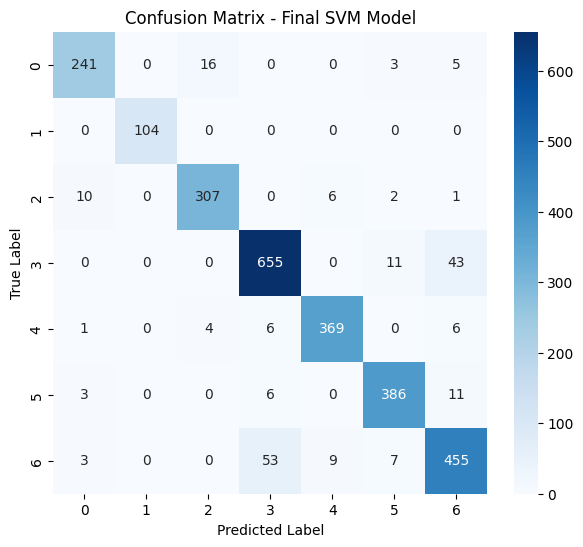

Weighted ROC-AUC Score for SVM : 0.9933


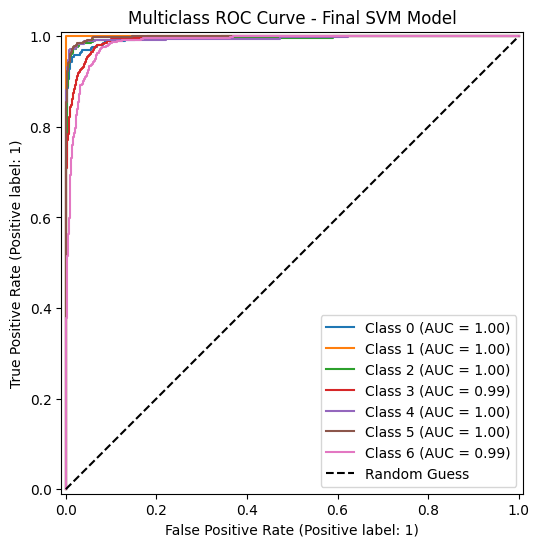

In [77]:
# Final Model Selection (SVM)
#---------------------------------

from sklearn.svm import SVC

final_model = SVC(
    C=10,
    gamma='scale',
    kernel='rbf',
    probability=True,
    random_state=42)

final_model.fit(x_train, y_train)

# predictions
y_test_pred = final_model.predict(x_test)
y_test_proba = final_model.predict_proba(x_test)


#Final Evaluation Metrics
#------------------------------
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted')

print('-'*63)
print("======================================")
print(" FINAL MODEL PERFORMANCE : SVM ")
print("======================================")
print(f"Test Accuracy : {accuracy:.4f}")
print(f"Test F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
#------------------------
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Final SVM Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Multiclass ROC-AUC Curve (One-vs-Rest)
#----------------------------------------

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Binarize labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# ROC-AUC score
roc_auc = roc_auc_score(
    y_test_bin,
    y_test_proba,
    multi_class='ovr',
    average='weighted'
)

print(f"Weighted ROC-AUC Score for SVM : {roc_auc:.4f}")

# Plot ROC curves
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_test_proba[:, i],
        name=f"Class {cls}",
        ax=plt.gca()
    )

plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.title("Multiclass ROC Curve - Final SVM Model")
plt.legend()
plt.show()


In [78]:
# Saving the trained SVM Model
#------------------------------
#The final SVM model trained for Dry Bean Classification has been
#serialized using Pickle and saved as model.pkl.
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("SVM model saved successfully as model.pkl")

SVM model saved successfully as model.pkl


In [79]:
# Load the saved model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Verify by predicting again
y_loaded_pred = loaded_model.predict(x_test)

from sklearn.metrics import f1_score
print("Loaded Model F1 Score:",
      f1_score(y_test, y_loaded_pred, average='weighted'))


Loaded Model F1 Score: 0.9242952775176317


## **13. Feature Importance Analysis**
---
---
Although SVM performed best, Random Forest was used for feature interpretability.
- Random Forest computes feature importance based on the decrease in impurity (Gini importance) contributed by each feature across all trees in the ensemble.

RF finding:
- Both size and shape characteristics play a crucial role in Dry Bean classification.
- Many features are similiar (Perimeter & Compactness, Convex area & Minor axis length, Area & Roundness)
- Extent & Solidity have minimal impact and can be used for feature reduction



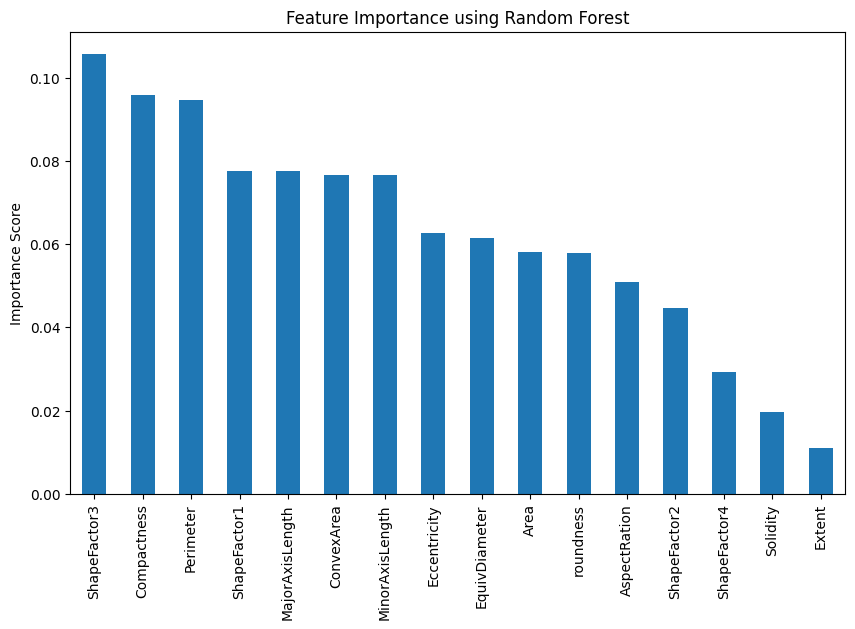

In [85]:

feature_importance = pd.Series(
    rf.feature_importances_,
    index=x.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance using Random Forest")
plt.ylabel("Importance Score")
plt.show()

## **14. Model Deployement**
---
---
The final SVM model trained for Dry Bean Classification has been serialized using Pickle and saved as model.pkl.
- Deployment of the model was done using Streamlit, a Python framework that allows creation of interactive web applications for machine learning models.
- The application, along with required dependencies, was uploaded to GitHub and deployed using Streamlit Cloud.
This allows users to input feature values and obtain dry bean class predictions through a web browser.

In [86]:
!pip install streamlit pyngrok scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.2 MB/s eta 0:00:00


In [87]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

st.title("Dry Bean Classification")

# Load trained model
model = pickle.load(open("model.pkl", "rb"))

st.subheader("Enter Feature Values")

# List of features
feature_names = [
    "Area", "Perimeter", "MajorAxisLength", "MinorAxisLength",
    "AspectRatio", "Eccentricity", "ConvexArea", "EquivDiameter",
    "Extent", "Solidity", "Roundness", "Compactness",
    "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4"
]

inputs = []
for feature in feature_names:
    val = st.number_input(feature, value=0.0)
    inputs.append(val)

if st.button("Predict"):
    X = np.array(inputs).reshape(1, -1)
    prediction = model.predict(X)
    st.success(f"Predicted Bean Class: {prediction[0]}")


Writing app.py


## **Results & Conclusion**
---
---
## RESULT:
- Multiple classification models were evaluated using accuracy and weighted F1-score.
- Among all the models, the Support Vector Machine (SVM) achieved the best overall performance with the highest F1-score on the test dataset.
- Hyperparameter tuning further improved the model’s generalization performance.

## CONCLUSION:
- The study demonstrates that machine learning models can effectively classify dry bean varieties using morphological features.

- After tuning and bias–variance analysis, SVM with RBF kernel achieved the best generalization with a test F1 score of 92.43% and minimal overfitting.

- SVM was selected as the final model due to its excellent genralization, strong performance and robustness.

- The trained model was successfully deployed using Streamlit, enabling real-time prediction through a user-friendly web interface

